In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
!pwd

/mnt/hgfs/share/SDRLabs/sdr-labs-robodojo


In [2]:
# Define variables:
signal_name = 'old_GDO'
filename = './samples/from_gdo_hackrf_3895e5_ook_burst.raw'
samp_rate = 8e6
center_freq = 389e6
# load data into variable - take a second or two for 400MB file
dat = np.fromfile(filename, dtype="complex64")

In [3]:
# what it generally looks like
dat

array([-0.00195312-0.00390625j,  0.        -0.02331543j,
        0.        -0.00195312j, ...,  0.0078125 -0.00195312j,
        0.        -0.00195312j,  0.        -0.00585938j], dtype=complex64)

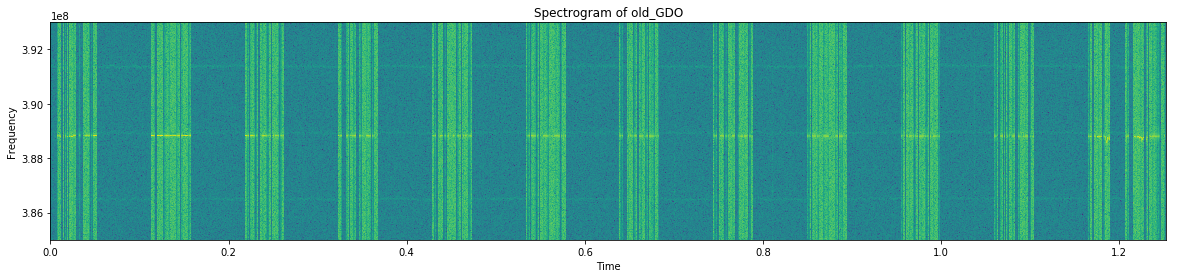

In [4]:
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Spectrogram of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

In [5]:
# The number of samples divided by sample rate (samps/sec) should give us the sample length (in seconds)
len(dat) / samp_rate

1.253106125

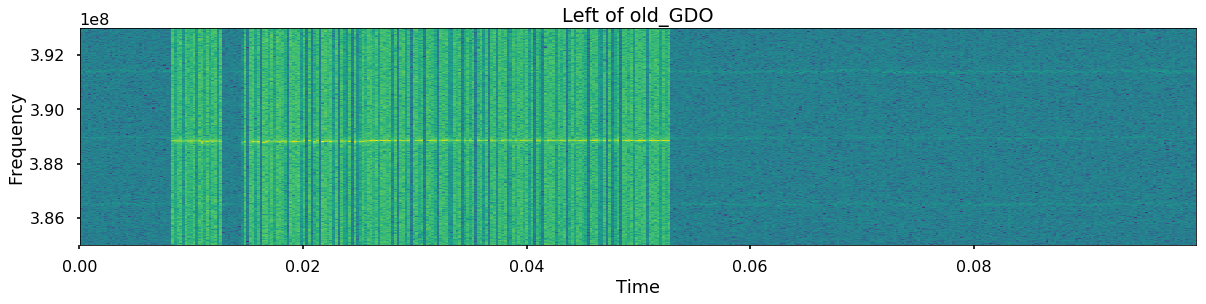

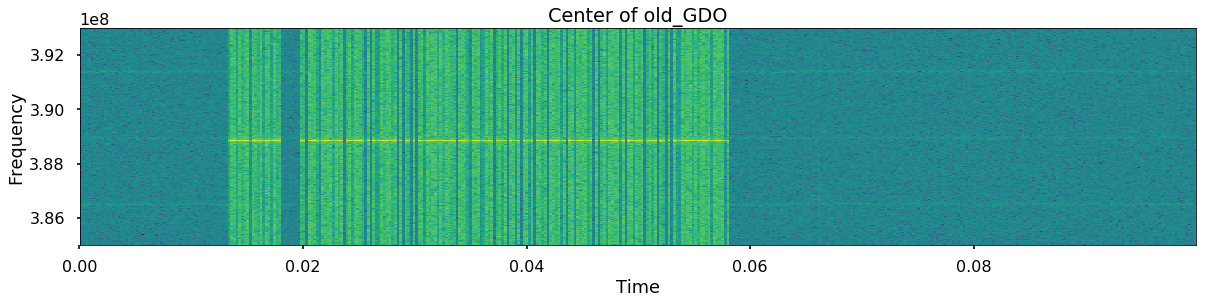

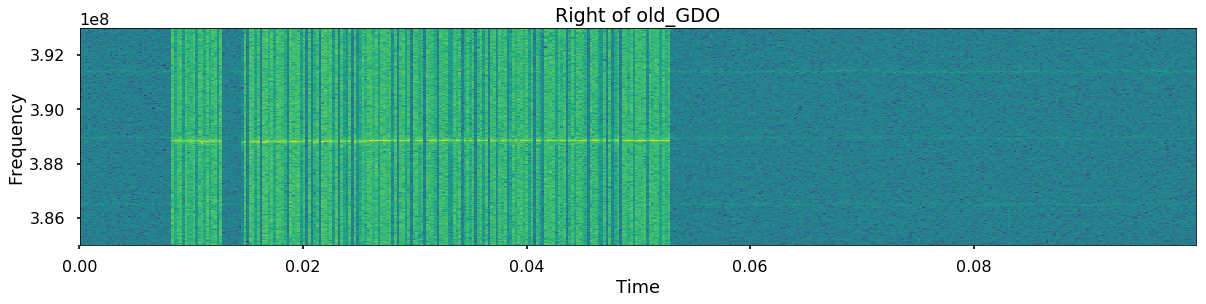

In [6]:
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
left = int(samp_rate*.1)
right = int(samp_rate*.2)
left_dat = dat[:left]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(left_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Left of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
cent_dat = dat[left:right]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(cent_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Center of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
right_dat = dat[right:]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(left_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Right of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

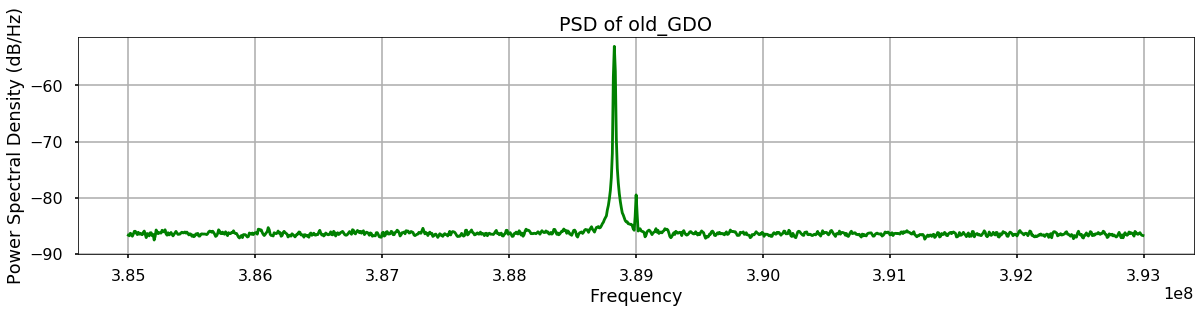

In [7]:
# now the sample is smaller, and it's Power Specrat Density looks like this
plt.figure(figsize=(20,4))
plt.title("PSD of "+signal_name)
plt.psd(cent_dat, NFFT=1024, Fs=samp_rate, Fc=center_freq, color="green")
plt.show()

In [8]:
# now trying to do a low pass filter:
# This eans, the filter affects the outer edges, the center being zer0 -- 
# so lower freqs pass, higher (farther from center) are blocked
f_bw = 100000 # 200k filter for FM 10000 # fileter bandwidth
Fs  = samp_rate # sample_rate
n_taps = 64   # taps?
lpf = signal.remez(n_taps, [0, f_bw, f_bw+(Fs/2-f_bw)/4, Fs/2], [1,0], Hz=Fs)
y = signal.lfilter(lpf, 1.0, cent_dat)

/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


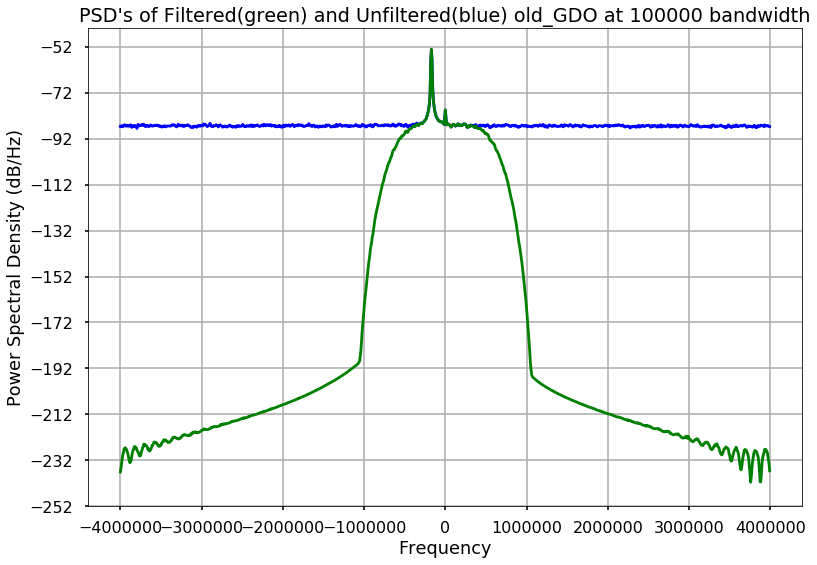

In [9]:
plt.psd(cent_dat, NFFT=1024, Fs=samp_rate, color="blue")  # original
plt.psd(y, NFFT=1024, Fs=samp_rate, color="green")  # filtered
plt.title("PSD's of Filtered(green) and Unfiltered(blue) " + signal_name + " at " + str(f_bw) + " bandwidth")
plt.show() 


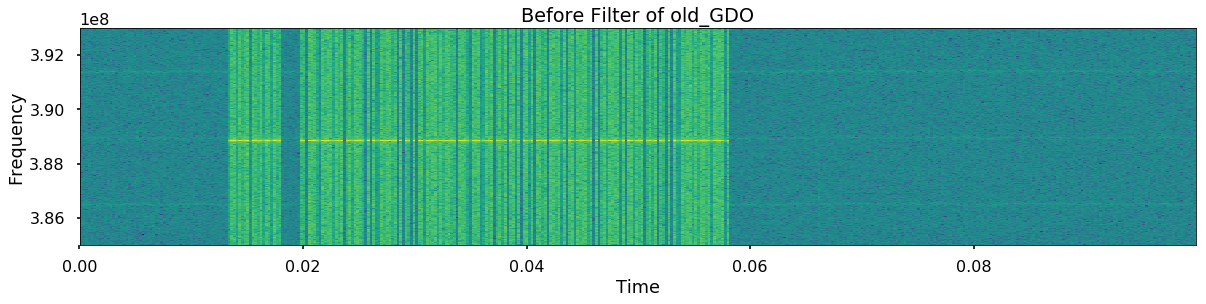

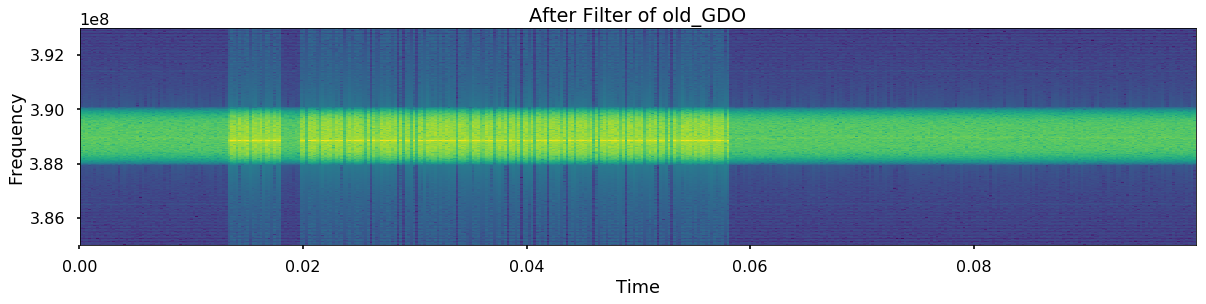

In [10]:
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(cent_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Before Filter of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(y, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("After Filter of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

In [13]:
# push the filtered and sliced sampels back out to a file
y.tofile(filename+'.cut.filtered.iq')
cent_dat.tofile(filename+'.cut.iq')

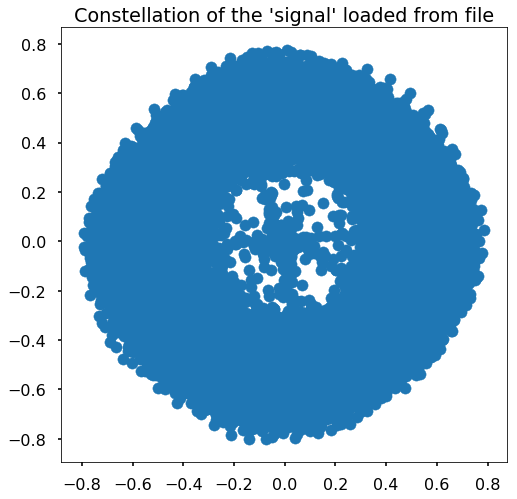

In [11]:
# And let's look at it on the complex plane (constellation)
# Note that showing *every* data point would be time- and processing-intensive
# so we'll just show a few
plt.figure(figsize=(8,8))
plt.scatter(np.real(y[200000:300000]), np.imag(y[200000:300000]))
plt.title("Constellation of the 'signal' loaded from file")
plt.show() 

ValueError: x and y must have same first dimension, but have shapes (1,) and (8000000,)

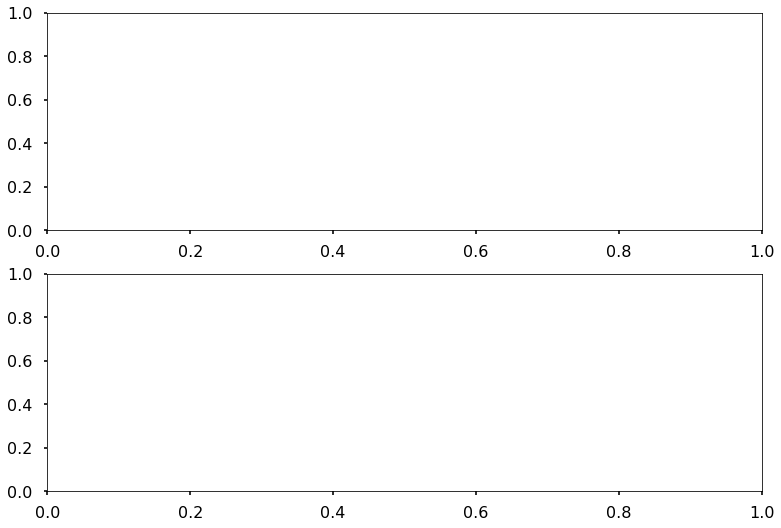

In [30]:
Fs = samp_rate;  # sampling rate
Ts = len(y)/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

#ff = 5;   # frequency of the signal
#y = np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
#Y = Y[range(n/2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()